<a href="https://colab.research.google.com/github/mainarel/-Numerical_methods/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

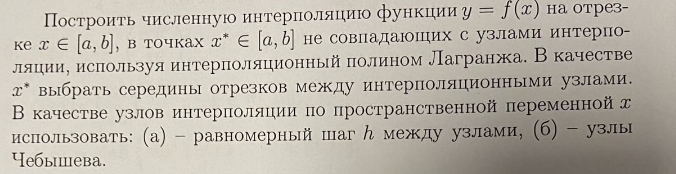

## *Равномерный шаг h между узлами*

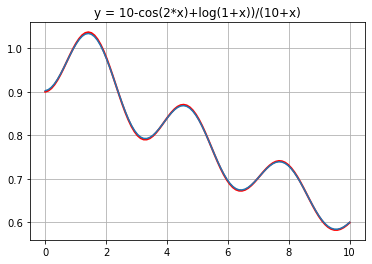

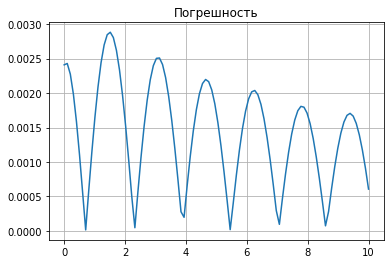

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import lambdify, Symbol

N = 40
a = 0
b = 10
h = (b-a)/(N-1)

x_int = np.arange(a,b+h,h)


def func(x):
    return (10-np.cos(2*x)+np.log(1+x))/(10+x)

y_int = func(x_int)

def lagrange(x, x_int, y_int):
    z = 0
    for j in range(len(y_int)):
        p1 = 1
        p2 = 1
        for i in range(len(x_int)):
            if i != j:
                p1 = p1 * (x - x_int[i])
                p2 = p2 * (x_int[j] - x_int[i])
        z = z + y_int[j] * p1 / p2
    return z


dix_X=[]
dix_Y=[]
for i in range(len(x_int)-1):
  dix_X.append((x_int[i] + x_int[i+1])/2)
  dix_Y.append((y_int[i] + y_int[i+1])/2)

new_x = np.linspace(0, 10, 100) 

new_y = [lagrange(x,dix_X,dix_Y) for x in new_x]
real_y = [func(x) for x in new_x]



plt.figure(1)
plt.grid(True)
plt.title('y = 10-cos(2*x)+log(1+x))/(10+x)')
plt.plot(new_x, real_y,  color='red', linewidth = 2)
plt.plot(new_x, new_y)

plt.figure(2)
plt.grid(True)
plt.title('Погрешность')
plt.plot(new_x, [(abs(real_y[i] - new_y[i]))  for i in range(len(new_y))  ] )
plt.show()



## *Узлы Чебышева*

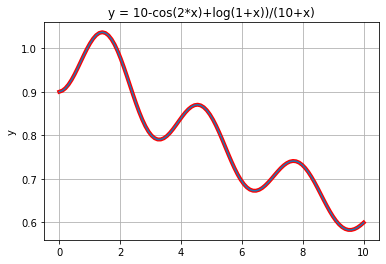

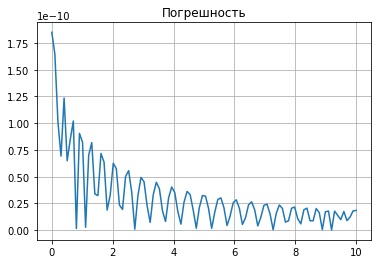

In [ ]:
from numpy.lib.type_check import real
import math
import numpy as np
n = 30
a = 0
b = 10

x_cheb = []
y_cheb = []


def func(x):
  return (10-np.cos(2*x)+np.log(1+x))/(10+x)
  

for i in range (1,n+1):
  x_cheb.append(5 + 5*math.cos((2 * i - 1) * math.pi / (2 * n)))
  y_cheb.append (func(x_cheb[i-1]))


new_x2 = np.linspace(0, 10, 100) 
new_y2 = [lagrange(x,x_cheb,y_cheb) for x in new_x2]
real_y1 = [func(x) for x in new_x2]

plt.figure(3)
plt.grid(True)
plt.title('y = 10-cos(2*x)+log(1+x))/(10+x)')
plt.ylabel("y")
plt.plot(new_x2, real_y1, color='red', linewidth = 4)
plt.plot(new_x2, new_y2)
plt.show()

plt.figure(4)
plt.grid(True)
plt.title('Погрешность')
plt.plot(   new_x2, [abs(new_y2[i] - real_y1[i]) for i in range(len(real_y1))  ] )
plt.show()

In [32]:
import math
import numpy as np
import sys

a = 0
b = 10
count_array = []
dfr_array_h = []
def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return max(dfr)
minmax = sys.maxsize
h_opt = 0

for count in range(20,200):

   step = (a+b)/(count-1)
   div_x1 = []
   div_y1 = []
   count_array.append(count)

 

   for_x = np.linspace(a, b, 100)
   x_array = np.arange(a,b+step,step)
   y_array = [func(element) for element in x_array]
  
   for i in range(len(x_array)-1):
     div_x1.append((x_array[i] + x_array[i+1])/2)
     div_y1.append((y_array[i] + y_array[i+1])/2)     

   new_y1 = [lagrange(x, div_x1, div_y1) for x in for_x]
   real_y1 = [func(x) for x in for_x]
   dfr_array_h.append((difference(real_y1, new_y1)))
  
   if (difference(real_y1, new_y1)) < minmax:
     minmax = difference(real_y1, new_y1)
     h_opt = step


#print ('Minmax погрешность', min(dfr_array_h))

print ('Minmax погрешность', minmax, 'при шаге', h_opt )

# plt.figure(1)
# plt.grid(True)
# plt.title("Погрешность a")
# plt.ylabel('Δy')
# plt.plot (count_array,dfr_array_h)

   


Minmax погрешность 0.0020755569009254238
Minmax погрешность 0.0020755569009254238 при шаге 0.21739130434782608
